In [1]:
#libraries
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

#preproccesing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,f1_score

#models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import Perceptron

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# path = 
path = r'C:\Users\talia\MachineLearning\dataset'

### Functions

In [3]:
def load(path):
    images = [path + i for i in os.listdir(path)]
    im = cv2.imread(images[0])
    if im is not None:
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        img = im
        plt.imshow(img)
    else:
        print("Failed to load image:", images[0])
    return images

def toList(images_list, labels_list, images, label):
    for index,i in enumerate(images):
        if index > 800:
            break        
        img = cv2.imread(i)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (50,50))
            images_list.append(pd.Series(img.flatten())) #used flatten method
            labels_list.append(label)
            if label == 'rainbow':
                img = cv2.flip(img,1)
                images_list.append(pd.Series(img.flatten())) #used flatten method
                labels_list.append(label)
                if index == 0:
                    plt.imshow(img)

## Loading Data

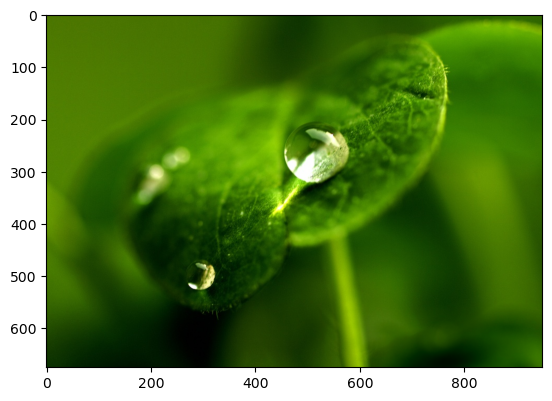

In [4]:
#dew
dew_images = load(path+'\dew/')

In [5]:
images = []
labels = []
 
toList(images, labels, dew_images, 'dew')

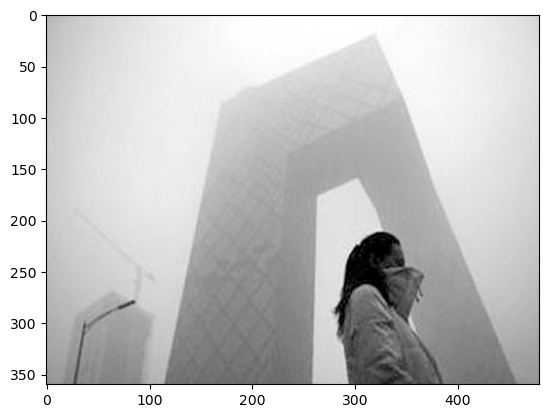

In [6]:
#fogsmog
fogsmog_images = load(path+'\\fogsmog/')

In [7]:
toList(images, labels, fogsmog_images, 'fogsmog')

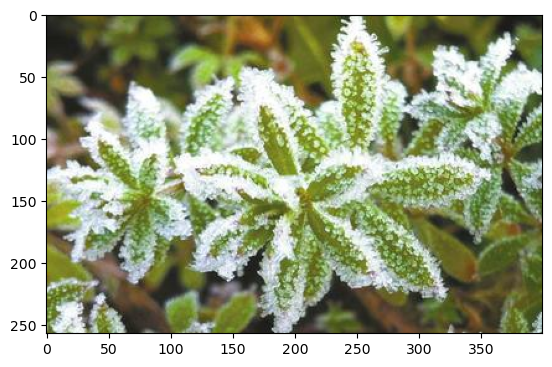

In [8]:
#frost
frost_images = load(path+'\\frost/')

In [9]:
toList(images, labels, frost_images, 'frost')

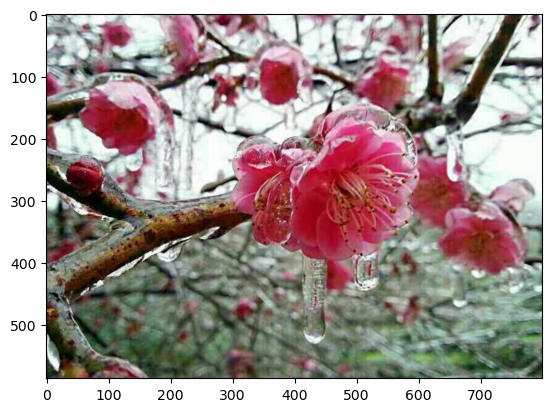

In [10]:
#glaze
glaze_images = load(path+'\glaze/')

In [11]:
toList(images, labels, glaze_images, 'glaze')

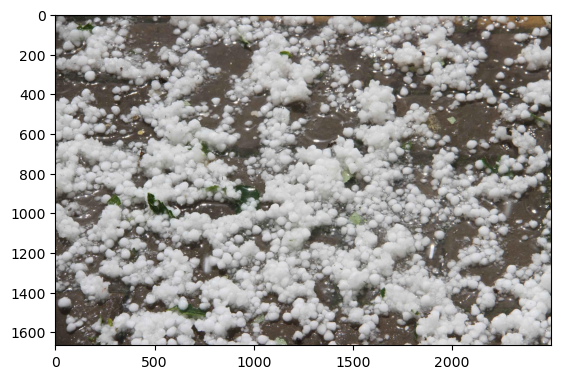

In [12]:
#hail
hail_images = load(path+'\hail/')

In [13]:
toList(images, labels, hail_images, 'hail')

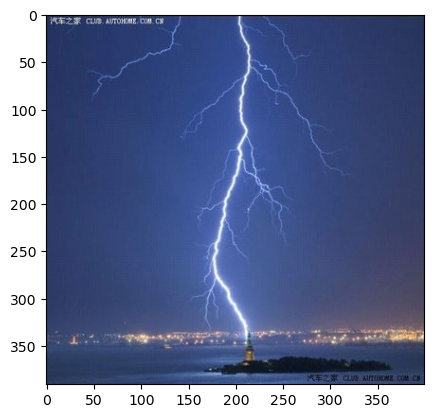

In [14]:
#lightning
lightning_images = load(path+'\lightning/')

In [15]:
toList(images, labels, lightning_images, 'lightning')

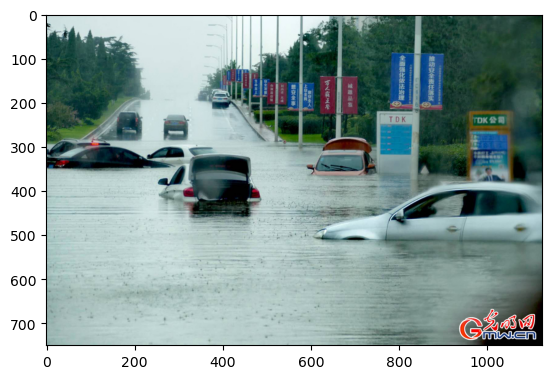

In [16]:
#rain
rain_images = load(path+'\\rain/')

In [17]:
toList(images, labels, rain_images, 'rain')

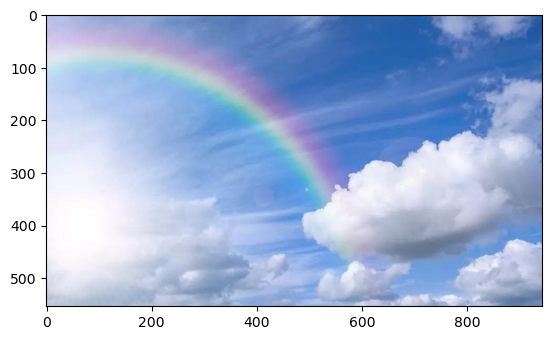

In [18]:
#rainbow
rainbow_images = load(path+'\\rainbow/')

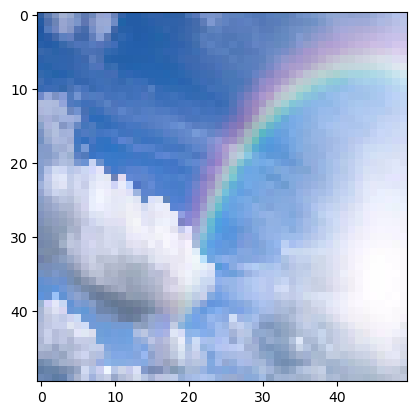

In [19]:
toList(images, labels, rainbow_images, 'rainbow')

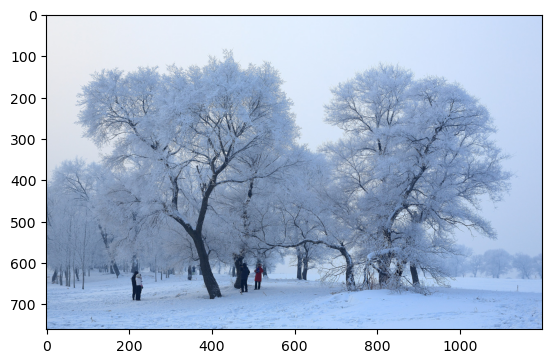

In [20]:
#rime
rime_images = load(path+'\\rime/')

In [21]:
toList(images, labels, rime_images, 'rime')

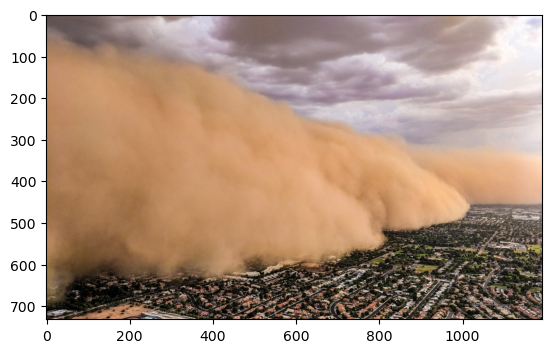

In [22]:
#sandstorm
sandstorm_images = load(path+'\sandstorm/')

In [23]:
toList(images, labels, sandstorm_images, 'sandstorm')

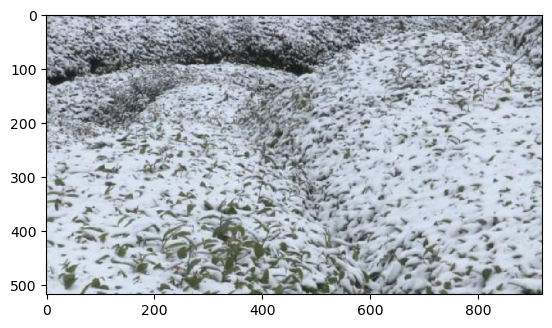

In [24]:
#snow
snow_images = load(path+'\snow/')

In [25]:
toList(images, labels, snow_images, 'snow')

## Visualization

In [26]:
images_df = pd.DataFrame(images)
images_df

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,76,119,1,76,116,1,75,118,0,77,...,1,22,79,0,34,90,0,54,112,0
1,39,51,29,47,59,35,44,56,32,38,...,75,75,104,70,84,111,76,66,96,60
2,38,58,8,78,106,45,54,77,30,34,...,5,1,0,5,1,0,5,1,0,5
3,0,16,0,0,21,0,0,26,1,0,...,2,1,51,2,1,51,2,2,52,1
4,213,227,228,201,217,217,217,228,230,216,...,228,210,220,223,196,210,210,191,204,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6678,78,80,89,122,122,132,102,102,112,150,...,115,94,100,98,119,125,125,88,87,85
6679,15,38,80,15,38,80,15,38,80,15,...,35,19,31,47,14,29,44,23,38,57
6680,141,165,198,132,159,191,144,169,209,141,...,72,28,33,18,87,79,67,58,57,38
6681,9,9,9,10,10,10,12,12,12,17,...,43,61,63,52,39,49,38,50,60,49


In [27]:
labels_df = pd.DataFrame(labels, columns=['labels'])
labels_df

,labels
0,dew
1,dew
2,dew
3,dew
4,dew
...,...
6678,snow
6679,snow
6680,snow
6681,snow


In [28]:
target_counts = labels_df['labels'].value_counts()
target_counts

rime         801
fogsmog      800
dew          698
sandstorm    692
glaze        639
snow         620
hail         591
rain         526
frost        475
rainbow      464
lightning    377
Name: labels, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'dew'),
  Text(1, 0, 'fogsmog'),
  Text(2, 0, 'frost'),
  Text(3, 0, 'glaze'),
  Text(4, 0, 'hail'),
  Text(5, 0, 'lightning'),
  Text(6, 0, 'rain'),
  Text(7, 0, 'rainbow'),
  Text(8, 0, 'rime'),
  Text(9, 0, 'sandstorm'),
  Text(10, 0, 'snow')])

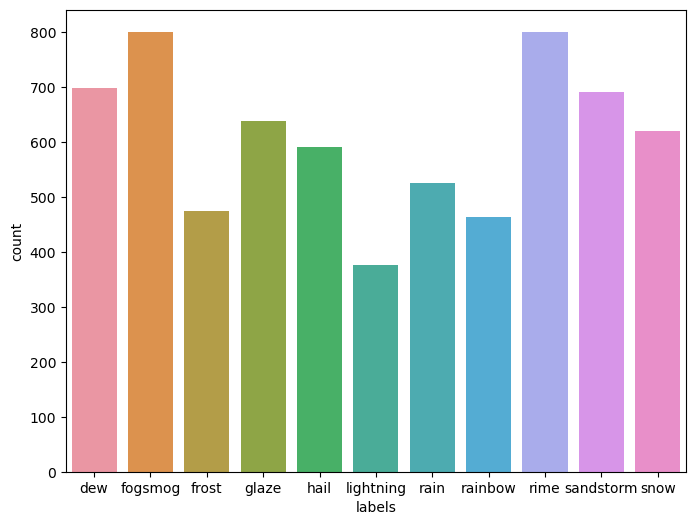

In [29]:
l = labels_df["labels"]
plt.figure(figsize = (8,6))
sns.countplot(l)
plt.xticks()

In [30]:
data_df = pd.concat([images_df, labels_df], axis=1)
data_df

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,labels
0,76,119,1,76,116,1,75,118,0,77,...,22,79,0,34,90,0,54,112,0,dew
1,39,51,29,47,59,35,44,56,32,38,...,75,104,70,84,111,76,66,96,60,dew
2,38,58,8,78,106,45,54,77,30,34,...,1,0,5,1,0,5,1,0,5,dew
3,0,16,0,0,21,0,0,26,1,0,...,1,51,2,1,51,2,2,52,1,dew
4,213,227,228,201,217,217,217,228,230,216,...,210,220,223,196,210,210,191,204,212,dew
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6678,78,80,89,122,122,132,102,102,112,150,...,94,100,98,119,125,125,88,87,85,snow
6679,15,38,80,15,38,80,15,38,80,15,...,19,31,47,14,29,44,23,38,57,snow
6680,141,165,198,132,159,191,144,169,209,141,...,28,33,18,87,79,67,58,57,38,snow
6681,9,9,9,10,10,10,12,12,12,17,...,61,63,52,39,49,38,50,60,49,snow


## preprocessing of data

In [31]:
# Split the training dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images_df, labels_df, test_size=0.3, random_state=42)
# Split the test dataset into test and validation sets
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print("Number of samples in the train set: ", len(X_train))
print("Number of samples in the test set: ", len(X_test))
print("Number of samples in the validation set: ", len(X_valid))

Number of samples in the train set:  4678
Number of samples in the test set:  1002
Number of samples in the validation set:  1003


In [32]:
X_train = X_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
X_test = X_test.astype(np.float32)

In [33]:
# Normalization
X_train /=255.
X_valid /=255.
X_test /=255.

# Modeling

### KNN

In [34]:
# score_list = []
# for each in range(1, 10):
#     knn2 = OneVsOneClassifier(KNeighborsClassifier(n_neighbors = each))
#     knn2.fit(X_train, y_train)
#     score_list.append(knn2.score(X_valid, y_valid))
# plt.plot(range(1,10), score_list)
# plt.xlabel("k values")
# plt.ylabel("Accuracy")
# plt.grid(True)
# plt.show()

In [35]:
knn = OneVsOneClassifier(KNeighborsClassifier(n_neighbors = 1))
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_valid)

In [36]:
knn_score = metrics.accuracy_score(y_valid, knn_pred)*100
print("KNN Algo Result : ",knn_score)

KNN Algo Result :  41.77467597208375


              precision    recall  f1-score   support

         dew       0.92      0.49      0.64       111
     fogsmog       0.25      0.88      0.39       122
       frost       0.80      0.06      0.11        67
       glaze       0.97      0.28      0.44       102
        hail       0.92      0.35      0.51        93
   lightning       0.54      0.58      0.56        67
        rain       0.32      0.16      0.21        77
     rainbow       0.27      0.61      0.38        56
        rime       0.46      0.11      0.18       106
   sandstorm       0.50      0.68      0.58       117
        snow       0.54      0.18      0.27        85

    accuracy                           0.42      1003
   macro avg       0.59      0.40      0.39      1003
weighted avg       0.60      0.42      0.40      1003



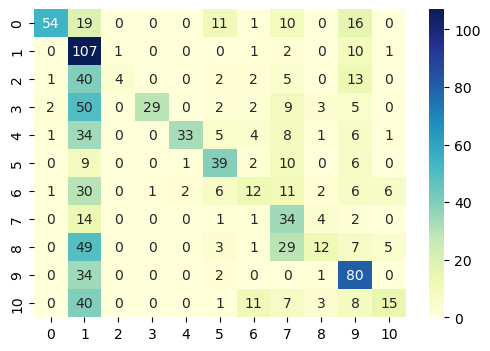

In [37]:
con_mat = confusion_matrix(y_valid, knn_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, knn_pred))

### SVM

In [38]:
svm = OneVsOneClassifier(make_pipeline(StandardScaler(), SVC(gamma='auto')))
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_valid)

In [39]:
svm_score = metrics.accuracy_score(y_valid, svm_pred)*100
print("SVM Algo Result : ",svm_score)

SVM Algo Result :  64.40677966101694


              precision    recall  f1-score   support

         dew       0.84      0.75      0.79       111
     fogsmog       0.67      0.84      0.74       122
       frost       0.44      0.30      0.36        67
       glaze       0.51      0.51      0.51       102
        hail       0.67      0.71      0.69        93
   lightning       0.79      0.66      0.72        67
        rain       0.51      0.43      0.46        77
     rainbow       0.60      0.57      0.59        56
        rime       0.57      0.72      0.63       106
   sandstorm       0.83      0.81      0.82       117
        snow       0.51      0.51      0.51        85

    accuracy                           0.64      1003
   macro avg       0.63      0.62      0.62      1003
weighted avg       0.64      0.64      0.64      1003



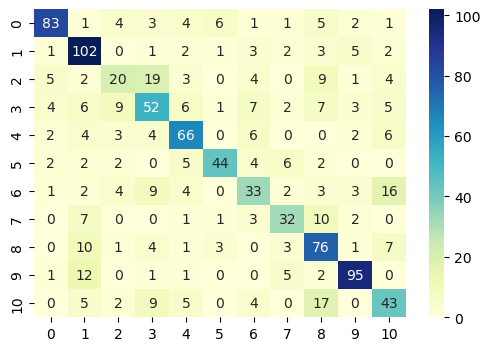

In [40]:
con_mat = confusion_matrix(y_valid, svm_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, svm_pred))

### AdaBoost

In [41]:
adac = OneVsOneClassifier(AdaBoostClassifier(Perceptron(tol=1e-3, random_state=0), n_estimators=20, algorithm="SAMME", learning_rate=0.1))
adac.fit(X_train, y_train)
adac_pred = adac.predict(X_valid)

In [51]:
adac_score = adac.score(X_valid, y_valid)*100
print("AdaBoost Classifier score: ", adac_score)

AdaBoost Classifier score:  56.929212362911265


              precision    recall  f1-score   support

         dew       0.65      0.69      0.67       111
     fogsmog       0.58      0.80      0.67       122
       frost       0.38      0.21      0.27        67
       glaze       0.70      0.37      0.49       102
        hail       0.71      0.54      0.61        93
   lightning       0.71      0.67      0.69        67
        rain       0.34      0.39      0.36        77
     rainbow       0.42      0.50      0.46        56
        rime       0.54      0.56      0.55       106
   sandstorm       0.68      0.80      0.73       117
        snow       0.43      0.45      0.44        85

    accuracy                           0.57      1003
   macro avg       0.56      0.54      0.54      1003
weighted avg       0.57      0.57      0.56      1003



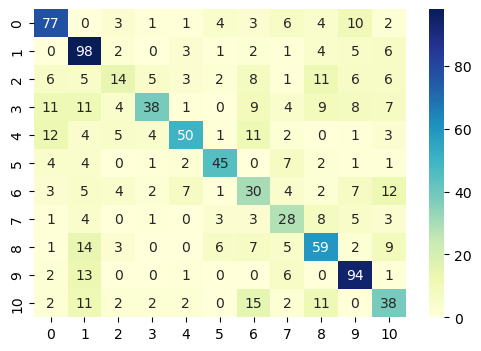

In [43]:
con_mat = confusion_matrix(y_valid, adac_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, adac_pred))

### Perceptron

In [44]:
per = OneVsOneClassifier(Perceptron(tol=1e-3, random_state=0))
per.fit(X_train, y_train)
per_pred = per.predict(X_valid)

In [52]:
per_score = per.score(X_train, y_train)*100
print("Perceptron Classifier score: ", per_score)

Perceptron Classifier score:  74.1342454040188


              precision    recall  f1-score   support

         dew       0.73      0.53      0.61       111
     fogsmog       0.47      0.75      0.58       122
       frost       0.23      0.10      0.14        67
       glaze       0.64      0.29      0.40       102
        hail       0.63      0.53      0.57        93
   lightning       0.71      0.66      0.68        67
        rain       0.42      0.34      0.37        77
     rainbow       0.45      0.39      0.42        56
        rime       0.43      0.58      0.50       106
   sandstorm       0.55      0.87      0.67       117
        snow       0.47      0.39      0.43        85

    accuracy                           0.52      1003
   macro avg       0.52      0.49      0.49      1003
weighted avg       0.53      0.52      0.51      1003



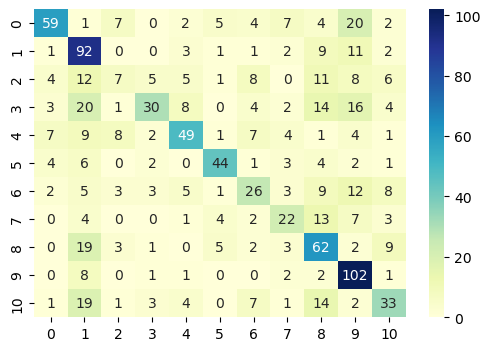

In [46]:
con_mat = confusion_matrix(y_valid, per_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, per_pred))

### Decision Trees

In [47]:
dtc = OneVsOneClassifier(DecisionTreeClassifier(random_state=0))
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_valid)

In [53]:
dtc_score = dtc.score(X_valid, y_valid)*100
print("Decision tree Algo Result : ", dtc_score)

Decision tree Algo Result :  51.844466600199404


              precision    recall  f1-score   support

         dew       0.65      0.53      0.58       111
     fogsmog       0.70      0.60      0.65       122
       frost       0.25      0.19      0.22        67
       glaze       0.46      0.47      0.46       102
        hail       0.47      0.47      0.47        93
   lightning       0.67      0.54      0.60        67
        rain       0.47      0.47      0.47        77
     rainbow       0.48      0.48      0.48        56
        rime       0.50      0.60      0.55       106
   sandstorm       0.61      0.65      0.63       117
        snow       0.37      0.52      0.43        85

    accuracy                           0.52      1003
   macro avg       0.51      0.50      0.50      1003
weighted avg       0.53      0.52      0.52      1003



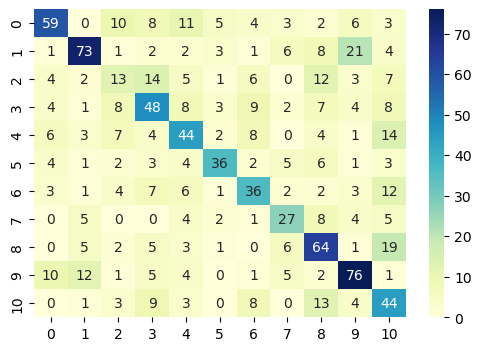

In [49]:
con_mat = confusion_matrix(y_valid, dtc_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, dtc_pred))

In [54]:
score_list = [knn_score, svm_score, adac_score, per_score, dtc_score]

data = [score_list]
index = ['score']
columns = ['KNN', 'SVM', 'AdaBoost', 'Perceptron', 'Decision Tree']

score_df = pd.DataFrame(data=data, index=index, columns=columns).T
score_df

,score
KNN,41.774676
SVM,64.406780
AdaBoost,56.929212
Perceptron,74.134245
Decision Tree,51.844467
